## John Hopkins Github

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns





pd.set_option('display.max_rows', 500)

In [2]:
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)
sns.set(style='darkgrid')

In [3]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [4]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181465,181534,181574,181666,181725,181808,181912,181987,182033,182072
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276821,277141,277141,277409,277444,277663,277940,278211,278504,278793
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265964,265968,265971,265975,265985,265993,266006,266015,266025,266030
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


## RKI, webscrape (webscraping)

In [10]:
time_idx=pd_raw.columns[4:]

In [11]:
df_plot = pd.DataFrame({
    'data':time_idx})
df_plot.head()

,data
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [12]:
pd_raw['Country/Region'].unique

<bound method Series.unique of 0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24       

In [13]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
7/18/22    29853680
7/19/22    29994679
7/20/22    30131303
7/21/22    30239122
7/22/22    30331131
Length: 913, dtype: int64

In [14]:
country_list=['Italy','US','Spain','Germany','Korea South']

In [15]:
pd_raw['Country/Region']=='Germany'

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [16]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
df_plot    

,data,Italy,US,Spain,Germany,Korea South
0,1/22/20,0,1,0,0,0.0
1,1/23/20,0,1,0,0,0.0
2,1/24/20,0,2,0,0,0.0
3,1/25/20,0,2,0,0,0.0
4,1/26/20,0,5,0,0,0.0
...,...,...,...,...,...,...
908,7/18/22,20177910,89712243,13090476,29853680,0.0
909,7/19/22,20299013,89830497,13132159,29994679,0.0
910,7/20/22,20385814,90046261,13132159,30131303,0.0
911,7/21/22,20467349,90200438,13132159,30239122,0.0


<AxesSubplot:xlabel='data'>

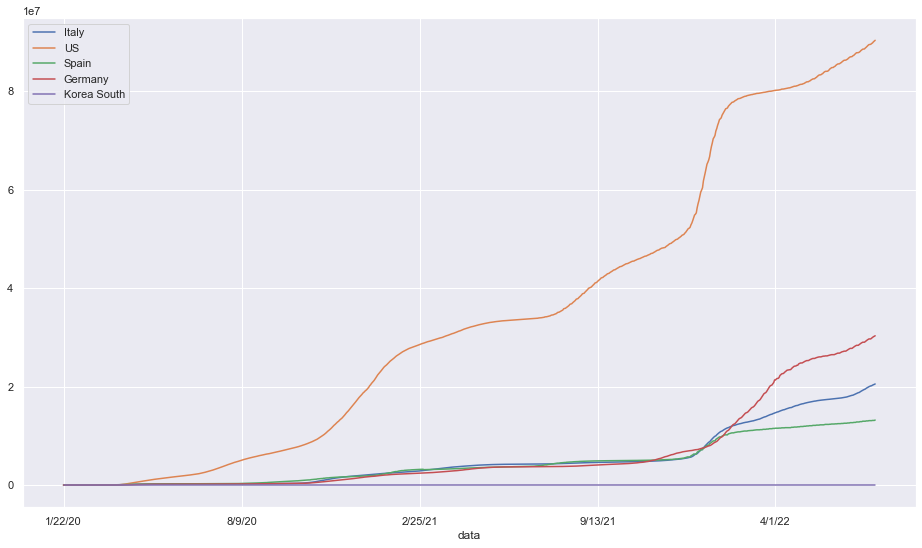

In [17]:
df_plot.set_index('data').plot()

In [18]:
df_plot.data[0]

'1/22/20'

In [19]:
datetime.strptime(df_plot.data[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [20]:
time_idx=[datetime.strptime(each,"%m/%d/%y") for each in df_plot.data]
time_str=[each.strftime('%Y-%m-%d') for each in time_idx]

In [21]:
time_str

['2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-

In [22]:
df_plot['data']=time_str

In [23]:
df_plot.head()

,data,Italy,US,Spain,Germany,Korea South
0,2020-01-22,0,1,0,0,0.0
1,2020-01-23,0,1,0,0,0.0
2,2020-01-24,0,2,0,0,0.0
3,2020-01-25,0,2,0,0,0.0
4,2020-01-26,0,5,0,0,0.0


In [24]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep=';')

In [25]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/13/22,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183285,183358,183407,183445,183572,183687,183908,184038,184224,184360
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,290954,290954,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266328,266356,266392,266424,266445,266487,266542,266591,266654,266700
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,44671,44671,44671,45061,45061,45061,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101320,101600,101901,101901,101901,102209,102209,102209,102209,102301


In [26]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country', 'Province/State':'state'})

In [27]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/13/22,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,183285,183358,183407,183445,183572,183687,183908,184038,184224,184360
1,NaN,Albania,0,0,0,0,0,0,0,0,...,290954,290954,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,266328,266356,266392,266424,266445,266487,266542,266591,266654,266700
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,44671,44671,44671,44671,44671,45061,45061,45061,45326,45326
4,NaN,Angola,0,0,0,0,0,0,0,0,...,101320,101600,101901,101901,101901,102209,102209,102209,102209,102301


In [28]:
test_pd=pd_data_base.set_index(['state','country']).T.stack(level=[0,1]).reset_index().rename(columns={'level_0':'date',
                                    0:'confirmed'},
                                       )

In [29]:
test_pd.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [30]:
test_pd['date']=test_pd.date.astype('datetime64[ns]')

In [31]:
df_plot.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

## Group-by apply

In [33]:
pd_JH_data=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('data',ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,data,Italy,US,Spain,Germany,Korea South
0,2020-01-22,0,1,0,0,0.0
1,2020-01-23,0,1,0,0,0.0
2,2020-01-24,0,2,0,0,0.0
3,2020-01-25,0,2,0,0,0.0
4,2020-01-26,0,5,0,0,0.0


In [34]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                      (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-03-20')]

KeyError: 'country'

In [ ]:
test_data.groupby(['country']).agg(np.max)

In [35]:
# %load ../src/features/build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate

        Parameters:
        ----------
        in_array : pandas.series

        Returns:
        ----------
        Doubling rate: double
    '''

    y = np.array(in_array['confirmed'])
    X = np.arange(len(y)).reshape(-1, 1)

    #assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope


# def savgol_filter(df_input,column='confirmed',window=5):
#     ''' Savgol Filter which can be used in groupby apply function (data structure kept)

#         parameters:
#         ----------
#         df_input : pandas.series
#         column : str
#         window : int
#             used data points to calculate the filter result

#         Returns:
#         ----------
#         df_result: pd.DataFrame
#             the index of the df_input has to be preserved in result
#     '''

#     degree=1
#     df_result=df_input

#     filter_in=df_input[column].fillna(0) # attention with the neutral element here

#     result=signal.savgol_filter(np.array(filter_in),
#                            window, # window size used for filtering
#                            1)
#     df_result[str(column+'_filtered')]=result
#     return df_result

# def rolling_reg(df_input,col='confirmed'):
#     ''' Rolling Regression to approximate the doubling time'

#         Parameters:
#         ----------
#         df_input: pd.DataFrame
#         col: str
#             defines the used column
#         Returns:
#         ----------
#         result: pd.DataFrame
#     '''
#     days_back=3
#     result=df_input[col].rolling(
#                 window=days_back,
#                 min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)



#     return result




# def calc_filtered_data(df_input,filter_on='confirmed'):
#     '''  Calculate savgol filter and return merged data frame

#         Parameters:
#         ----------
#         df_input: pd.DataFrame
#         filter_on: str
#             defines the used column
#         Returns:
#         ----------
#         df_output: pd.DataFrame
#             the result will be joined as a new column on the input data frame
#     '''

#     must_contain=set(['state','country',filter_on])
#     assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'

#     df_output=df_input.copy() # we need a copy here otherwise the filter_on column will be overwritten

#     pd_filtered_result=df_output[['state','country',filter_on]].groupby(['state','country']).apply(savgol_filter)#.reset_index()

#     #print('--+++ after group by apply')
#     #print(pd_filtered_result[pd_filtered_result['country']=='Germany'].tail())

#     #df_output=pd.merge(df_output,pd_filtered_result[['index',str(filter_on+'_filtered')]],on=['index'],how='left')
#     df_output=pd.merge(df_output,pd_filtered_result[[str(filter_on+'_filtered')]],left_index=True,right_index=True,how='left')
#     #print(df_output[df_output['country']=='Germany'].tail())
#     return df_output.copy()





# def calc_doubling_rate(df_input,filter_on='confirmed'):
#     ''' Calculate approximated doubling rate and return merged data frame

#         Parameters:
#         ----------
#         df_input: pd.DataFrame
#         filter_on: str
#             defines the used column
#         Returns:
#         ----------
#         df_output: pd.DataFrame
#             the result will be joined as a new column on the input data frame
#     '''

#     must_contain=set(['state','country',filter_on])
#     assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'


#     pd_DR_result= df_input.groupby(['state','country']).apply(rolling_reg,filter_on).reset_index()

#     pd_DR_result=pd_DR_result.rename(columns={filter_on:filter_on+'_DR',
#                              'level_2':'index'})

#     #we do the merge on the index of our big table and on the index column after groupby
#     df_output=pd.merge(df_input,pd_DR_result[['index',str(filter_on+'_DR')]],left_index=True,right_on=['index'],how='left')
#     df_output=df_output.drop(columns=['index'])


#     return df_output


#if __name__ == '__main__':
 #   test_data_reg=np.array([2,4,6])
  #  result=get_doubling_time_via_regression(test_data_reg)
   # print('the test slope is: '+str(result))

    # pd_JH_data=pd.read_csv('data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
    # pd_JH_data=pd_JH_data.sort_values('date',ascending=True).copy()

    # #test_structure=pd_JH_data[((pd_JH_data['country']=='US')|
    # #                  (pd_JH_data['country']=='Germany'))]

    # pd_result_larg=calc_filtered_data(pd_JH_data)
    # pd_result_larg=calc_doubling_rate(pd_result_larg)
    # pd_result_larg=calc_doubling_rate(pd_result_larg,'confirmed_filtered')


    # mask=pd_result_larg['confirmed']>100
    # pd_result_larg['confirmed_filtered_DR']=pd_result_larg['confirmed_filtered_DR'].where(mask, other=np.NaN)
    # pd_result_larg.to_csv('data/processed/COVID_final_set.csv',sep=';',index=False)
    # print(pd_result_larg[pd_result_larg['country']=='Germany'].tail())

In [36]:
test_data.groupby(['state','country']).agg(np.max)

NameError: name 'test_data' is not defined

In [37]:
#test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

In [38]:
#test_data[['state','country','confirmed']].groupby(['state','country'])

In [39]:
def rolling_reg(df_input,col='confirmed'):
    days_back=3
    result=df_input[col].rolling(
            window=days_back,
            min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result

In [40]:
test_data['confirmed']

NameError: name 'test_data' is not defined

In [ ]:
test_data[['state','country','confirmed']].groupby(['state','country']).head()

In [ ]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

In [ ]:
pd_DR_result = pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [ ]:
pd_DR_result = pd_DR_result.rename(columns={'confirmed':'doubling_rate','level_2':'index'}) 
pd_DR_result.head()

In [ ]:
pd_JH_data = pd_JH_data.reset_index().head()
pd_JH_data.head()

In [ ]:
pd_result_large = pd.merge(pd_JH_data,pd_DR_result[['index','doubling_rate']],on=['index'],how='left')

In [ ]:
pd_result_large

## Filtering the data with groupby apply

In [41]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result
        

## Explorativ Data Analysis with Matplotlib

In [ ]:
df_plot=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.head()

In [ ]:
df_plot_drop = df_plot.drop('Unnamed: 0',axis=1)
df_plot_drop

In [ ]:
ax=df_plot_drop.iloc[15:,:].set_index('data').plot()
plt.ylim(10,100000000)
ax.set_yscale('log')

## Plot.ly for interactive charts

In [6]:
import plotly.graph_objects as go

In [7]:
import plotly
plotly.__version__

'5.9.0'

In [8]:
# define figure object
fig = go.Figure()

In [9]:
# defines, how to plot the individual trace

for each in country_list:
    fig.add_trace(go.Scatter(
        x=df_plot_drop.data,
        y=df_plot_drop[each],
        mode='markers+lines',
        opacity=0.9,
        name=each))

# defines the overall layout
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Confirmed infected people',
    width=1600,
    height=1200,
    )

#fig.update_yaxes(type='log',range=[1.1,10])
#fig.update_layout(xaxis_rangeslider_visible=True)
#fig.show(renderer='chrome')

NameError: name 'country_list' is not defined

In [ ]:
import dash
from dash import dcc
from dash import html

app = dash.Dash()
app.layout = html.Div([
                      dcc.Graph(figure=fig, id='main_window_slope'),
                      html.Label('Multi-Select Country'),
                      dcc.Dropdown(
                          id='country_drop_down',
                          options=[
                              {'label': 'Italy', 'value': 'Italy'},
                              {'label': 'US', 'value': 'US'},
                              {'label': 'Spain', 'value': 'Spain'},
                              {'label': 'Germany', 'value': 'Germany'},
                              {'label': 'Korea, South', 'value': 'Korea, South'}
                          ],
                          value=['US', 'Germany'],
                          multi=True
                      )
                      
])

In [ ]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = []
    for each in country_list:
        traces.append(dict( 
            x=df_plot_drop.data,
            y=df_plot_drop[each],
            mode='markers+lines',
            opacity=0.9,
            name=each))
        
    return {
        'data': traces,
        'layout': dict(
            xaxis_title='Time',
            yaxis_title='Confirmed infected people',
            width=1600,
            height=1200,
            xaxis={'tickangle':-45,
                    'nticks':20,
                    'tickfont':dict(size=14,color='#7f7f7f')},
            yaxis={'type':'log',
                  'range':'[1.1,5.5]'},
        )
    }

In [ ]:
#app.run_server(debug=True, use_reloader=False) # Turn off reloader if inside Jupyter

## Chapter 6.1 - Modeling spread

In [ ]:
df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';',parse_dates=[0])
df_analyse=df_analyse.sort_values('data',ascending=True).drop('Unnamed: 0',axis=1)
df_analyse

### Helper functions

In [ ]:
def quick_plot(x_in,df_input,y_scale, slider=False):
    
    fig = go.Figure()
    
    for each in df_input.columns:
        fig.add_trace(go.Scatter(
            x=x_in,
            y=df_input[each],
            mode='markers+lines',
            opacity=0.8,
            name=each))

    fig.update_layout(
        autosize=True,
        yaxis_type=y_scale,
        xaxis_title='Time',
        yaxis_title='Confirmed infected people',
        width=1000,
        height=800,
        xaxis={'tickangle':-45,
                    'nticks':20,
                    'tickfont':dict(size=14,color='#7f7f7f')}
        )
   # fig.update_yaxes(type=y_scale),

    
    if slider==True:
        fig.update_layout(xaxis_rangeslider_visible=True)
        fig.show()

In [ ]:
quick_plot(
    df_analyse.data,
    df_analyse.iloc[:,2:],
    y_scale='log',
    slider=True
    
          )

In [ ]:
threshold=100

In [ ]:
compare_list=[]

for pos,country in enumerate(df_analyse.columns[1:]):
    compare_list.append(np.array(df_analyse[country][df_analyse[country]>threshold]))

In [ ]:
pd_sync_timelines=pd.DataFrame(compare_list,index=df_analyse.columns[1:]).T
pd_sync_timelines

In [ ]:
pd_sync_timelines['data']=np.arange(pd_sync_timelines.shape[0])

In [ ]:
pd_sync_timelines

In [ ]:
quick_plot(
    pd_sync_timelines.data,
    pd_sync_timelines.iloc[:,:-1],
    y_scale='log',
    slider=True
          )

$N(t)=N_0*2^t$

In [ ]:
def doubling_rate(N_0,t,T_d):
    return N_0*np.power(2,t/T_d)

In [ ]:
max_days = 400

norm_slopes={
    'doubling every day':doubling_rate(100,np.arange(max_days),1),
    'doubling every two days:':doubling_rate(100,np.arange(max_days),2),
    'doubling every 4 days:':doubling_rate(100,np.arange(max_days),4),
    'doubling every 10 days:':doubling_rate(100,np.arange(max_days),10),
}

In [ ]:
pd.concat([pd.DataFrame(norm_slopes),pd_sync_timelines],axis=1)

## Chapter 6.5 Scikit_Learn_Linear_Regression

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False)

In [ ]:
df_analyse_cut=len(df_analyse['Germany'].iloc[5:80])


In [ ]:

#l_vec=len(df_analyse['Germany'].iloc[5:80,:])
df_analyse_cut=len(df_analyse['Germany'].iloc[5:80])
X=np.arange(df_analyse_cut).reshape(-1, 1)
y=np.log(np.array(df_analyse['Germany'][5:80]))

In [ ]:
len(y)

In [ ]:
reg.fit(X,y)

In [ ]:
X_hat=np.arange(df_analyse_cut).reshape(-1, 1)
#X_hat=np.arange(l_vec-5).reshape(-1, 1)
Y_hat=reg.predict(X_hat)

In [ ]:
LR_inspect=df_analyse[['data','Germany']].iloc[5:80].copy()

In [ ]:
LR_inspect

In [ ]:
LR_inspect['prediction']=np.exp(Y_hat)

In [ ]:
LR_inspect

In [ ]:
quick_plot(LR_inspect.data,
           LR_inspect.iloc[:,1:],
           y_scale='log',
           slider=True)

### Doubling Rate - Piecewise Linear Regression

In [ ]:
from scipy import signal

In [ ]:
for each in country_list:
    
    df_analyse[each+'_filter']=signal.savgol_filter(df_analyse[each],3,1)

In [ ]:
filter_cols=['US_filter', 'Spain_filter', 'Germany_filter', 'Korea South_filter']

In [ ]:
start_pos=5
quick_plot(df_analyse.data[start_pos:40],
          df_analyse[filter_cols].iloc[start_pos:40],
          y_scale='log',
          slider=True)

In [ ]:
reg = linear_model.LinearRegression(fit_intercept=True)
l_vec=len(df_analyse['Germany'])
X=np.arange(l_vec-1).reshape(-1,1)
y=np.array(df_analyse['Germany'][50:])

In [ ]:
reg.fit(X,y)

In [ ]:
reg.intercept_

In [ ]:
reg.coef_

In [ ]:
reg.coef_/reg.intercept_

In [ ]:
def get_rate_via_regression(in_array):
    y=np.array(in_array)
    X=np.arange(-1,2).reshape(-1,1)
    
    assert len(in_array)==3
    
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_
    
    return intercept/slope

In [ ]:
df_analyse['Germany_DR']=df_analyse['Germany'].rolling(window=3,
                             min_periods=3).apply(get_rate_via_regression)

In [ ]:
quick_plot(df_analyse.data,df_analyse.iloc[40:80,[6]],y_scale='linear', slider=True)

In [ ]:
import subprocess
import os

In [ ]:
import subprocess
import os

import pandas as pd
import numpy as np
import git

from datetime import datetime

import requests
import json

def get_johns_hopkins():
    git_pull = subprocess.Popen( "/usr/bin/git pull" , 
        cwd = os.path.dirname( '../data/raw/COVID-19/' ), 
        shell = True, 
        stdout = subprocess.PIPE, 
        stderr = subprocess.PIPE )
    (out, error) = git_pull.communicate()


    print("Error : " + str(error)) 
    print("out : " + str(out))

def get_current_data_germany():
    ''' Get current data from germany, attention API endpoint not too stable
        Result data frame is stored as pd.DataFrame
    '''
    # 16 states
    #data=requests.get('https://services7.arcgis.com/mOBPykOjAyBO2ZKk/arcgis/rest/services/Coronaf%C3%A4lle_in_den_Bundesl%C3%A4ndern/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')

    # 400 regions / Landkreise
    data=requests.get('https://services7.arcgis.com/mOBPykOjAyBO2ZKk/arcgis/rest/services/RKI_Landkreisdaten/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')

    json_object=json.loads(data.content)
    full_list=[]
    for pos,each_dict in enumerate (json_object['features'][:]):
        full_list.append(each_dict['attributes'])

    pd_full_list=pd.DataFrame(full_list)
    pd_full_list.to_csv('data/raw/NPGEO/GER_state_data.csv',sep=';')
    print(' Number of regions rows: '+str(pd_full_list.shape[0]))

if __name__ == '__main__':
    get_johns_hopkins()
    get_current_data_germany()

In [43]:
data_path='../data/raw/covid-19-data/public/data/jhu/total_cases.csv'
pd_raw=pd.read_csv(data_path)

pd_relational_model = pd_raw.fillna(method='ffill')
pd_relational_model=pd_relational_model.set_index('date').stack(level=0).reset_index().rename(columns={'level_1':'country',
                                                                    0:'confirmed'},)
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

pd_relational_model = pd_relational_model[pd_relational_model['country']=='Germany']

pd_relational_model.to_csv('../data/processed/Relational_data.csv',sep=';', index=False)

print(' Number of rows stored: '+str(pd_relational_model.shape[0]))

 Number of rows stored: 908


In [56]:
data_path='../data/raw/covid-19-data/public/data/jhu/total_cases.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.set_index('date').drop(['World','Asia','Europe','High income','Upper middle income','Lower middle income','European Union','North America','South America'],axis=1).stack().reset_index().rename(columns={'level_1':'country',0:'confirmed'})

,date,country,confirmed
0,2020-01-22,China,547.0
1,2020-01-22,Japan,2.0
2,2020-01-22,Macao,1.0
3,2020-01-22,South Korea,1.0
4,2020-01-22,Taiwan,1.0
...,...,...,...
186851,2022-07-22,Vietnam,10766128.0
186852,2022-07-22,Wallis and Futuna,533.0
186853,2022-07-22,Yemen,11849.0
186854,2022-07-22,Zambia,328550.0
